In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.cm as cmx
import matplotlib.colors as colors

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.size"] = 15
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [12]:
df = pd.read_csv("../data/embedding_example/embedding_arc.csv")#.set_index("type")

In [3]:
df_rsm = pd.read_csv("../data/data.csv")
df_qmof = pd.read_csv("../data/qmof-data.csv")

df_rsm.rename(columns={"cif.label": "mofid"}, inplace=True)
df_qmof.rename(columns={"qmof_id": "mofid"}, inplace=True)

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_25590/450672045.py:2: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_qmof = pd.read_csv("../data/qmof-data.csv")


In [4]:
df_info = pd.concat([df_rsm, df_qmof])

In [5]:
df_info = pd.read_csv("../data/arc_topology.csv")
df_info.rename(columns={"Name": "type"}, inplace=True)

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_30172/4189466731.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_info = pd.read_csv("../data/arc_topology.csv")


In [6]:
df_info["type"] = [name.rsplit(".cif")[0]+"_repeat" for name in df_info["type"]]

In [13]:
df = df.merge(df_info[["type", "likely topology"]])

In [22]:
X = df.iloc[:, 1:-1].values

In [23]:
pca_obj = PCA(n_components=4, random_state=2020)
pca = pca_obj.fit_transform(X)

In [24]:
tsne_obj = TSNE(n_components=2, learning_rate=200, random_state=2023, n_jobs=6)
tsne = tsne_obj.fit_transform(pca)

In [10]:
emb_rsm = tsne[0:len(df_rsm)]
emb_qmof = tsne[-len(df_qmof):]
emb_hmof = tsne[len(df_rsm):-len(df_qmof)]

In [42]:
len(emb_rsm), len(emb_hmof), len(emb_qmof)

(3257, 0, 20375)

In [43]:
emb_color = [0] * emb_rsm.shape[0] + [1] * emb_hmof.shape[0] + [2] * emb_qmof.shape[0]

In [25]:
# Get unique names of species
uniq = list(set(df['likely topology']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

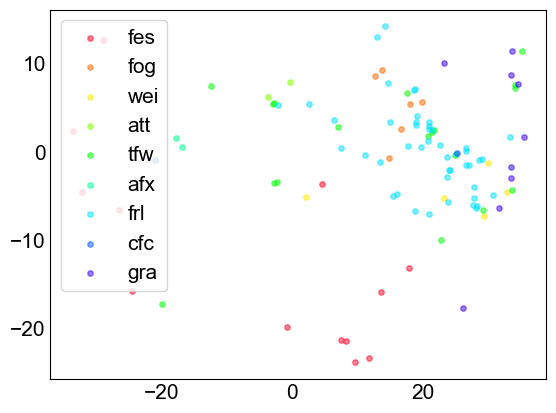

In [36]:
for i in [0, 54, 100, 150, 200, 250, 300, 350, 400]: #range(len(uniq)):
    indx = df['likely topology'] == uniq[i]
    plt.scatter(tsne[indx, 0], tsne[indx, 1], s=15, color=scalarMap.to_rgba(i), label=uniq[i], alpha=.5)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


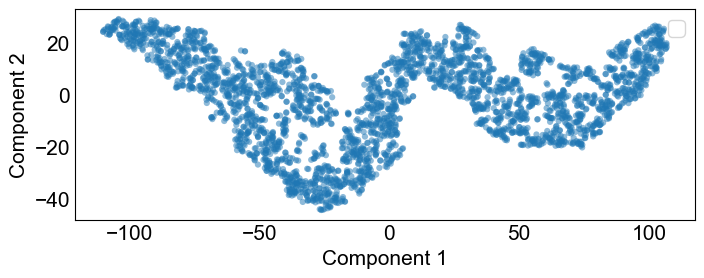

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=20, edgecolor="None", alpha=.5)
#plt.scatter(x=emb_hmof[:, 0], y=emb_hmof[:, 1], s=10, edgecolor="None", c="lightyellow", alpha=.5, label="hMOF")
#plt.scatter(x=emb_qmof[:, 0], y=emb_qmof[:, 1], s=10, edgecolor="None", c="yellowgreen", alpha=.5, label="QMOF")
#plt.scatter(x=emb_rsm[:, 0], y=emb_rsm[:, 1], s=10, edgecolor="None", c="slategray", alpha=.5, label="RSM MOF")

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

ax.legend()
plt.show()

In [27]:
df_to_eva = df_qmof
hash_name = "info.decorated_graph_hash"

In [28]:
vc = df_to_eva[hash_name].value_counts()
vc = vc[vc > 1]
vc

aca302c5ab35024dc6abaf05420b7a64    2
289905b0befe79c791e73fd248b341d2    2
afdf540d3d139dfc0ad9a02e0b0d407c    2
724f00175a9511a600ee752461e8ba86    2
7647b0a6667da0fd6c67d6a2416a642a    2
Name: info.decorated_graph_hash, dtype: int64

In [29]:
groups = []
for hash in list(vc.keys()):
    groups.append(list(df_to_eva[df_to_eva[hash_name] == hash]["mofid"]))

color_idx = [[df.index.get_loc(name) for name in group] for group in groups]

In [30]:
groups

[['qmof-1ecf90e', 'qmof-543c417'],
 ['qmof-198e8dc', 'qmof-7bda122'],
 ['qmof-62cf3da', 'qmof-b2f2b6c'],
 ['qmof-876addd', 'qmof-3a3a471'],
 ['qmof-da0a751', 'qmof-33487ab']]

In [31]:
"""
color_idx = []
for group in groups:
    group_idx = []
    for name in group:
        search_name = (name+".cif").rstrip(".cif")
        group_idx.append(df.index.get_loc(search_name))
    color_idx.append(group_idx)
"""

'\ncolor_idx = []\nfor group in groups:\n    group_idx = []\n    for name in group:\n        search_name = (name+".cif").rstrip(".cif")\n        group_idx.append(df.index.get_loc(search_name))\n    color_idx.append(group_idx)\n'

In [32]:
color_list = ["red", "deepskyblue", "orange", "slateblue", "purple", "green", "hotpink", 
        "yellow", "cyan", "lime","darkviolet", "darkcyan", "cornflowerblue",
        "lightcoral", "maroon", "chocolate", "lawngreen", "gold", 
        "olive", "turquoise", "teal", "blue", "slategray", "darkseagreen",
        "mediumblue", "plum", "thistle", "orchid", "black", "lightslategrey", "saddlebrown"
        ]

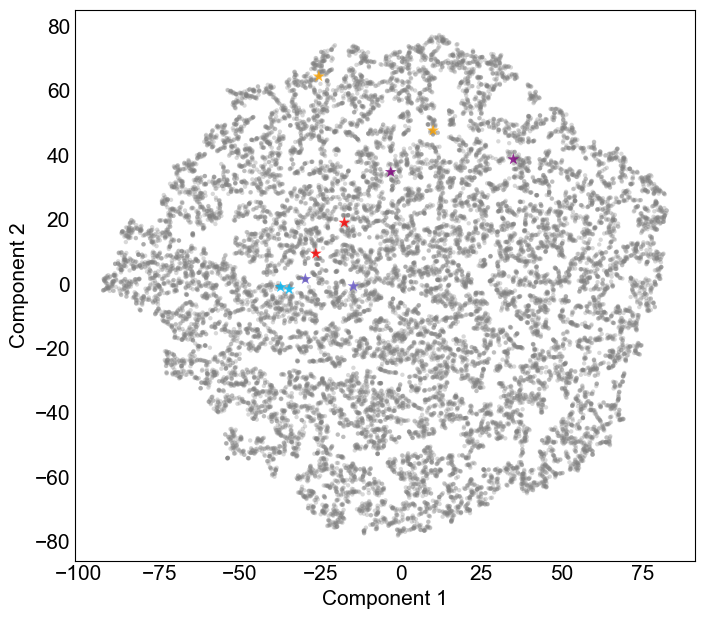

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=tsne[:, 0], y=tsne[:, 1], s=10, edgecolor="None", c="grey", alpha=0.3)

for id, group in enumerate(color_idx):
    if id < len(color_list):
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="*", s=80, edgecolor="None", color=color_list[id], alpha=0.8, label=id)
    elif id < 2 * len(color_list)-1:
        c_id = id - len(color_list)
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="X", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 3 * len(color_list)-1:
        c_id = id - len(color_list) * 2
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="s", s=40, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 4 * len(color_list)-1:
        c_id = id - len(color_list) * 3
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="P", s=60, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 5 * len(color_list)-1:
        c_id = id - len(color_list) * 4
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="v", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 6 * len(color_list)-1:
        c_id = id - len(color_list) * 5
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="8", s=80, edgecolor="None", color=color_list[c_id], alpha=0.8, label=id)
    elif id < 7 * len(color_list)-1:
        c_id = id - len(color_list) * 6
        plt.scatter(x=tsne[group, 0], y=tsne[group, 1], marker="3", s=80, color=color_list[c_id], alpha=0.8, label=id)


ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
plt.rcParams['legend.fontsize'] = 13
#ax.legend()

plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-4.098606  , -3.81660915, -3.5346123 , -3.25261545, -2.9706186 ,
        -2.68862175, -2.4066249 , -2.12462805, -1.8426312 , -1.56063435,
        -1.2786375 , -0.99664065, -0.7146438 , -0.43264695, -0.1506501 ,
         0.13134675,  0.4133436 ,  0.69534045,  0.9773373 ,  1.25933415,
         1.541331  ,  1.82332785,  2.1053247 ,  2.38732155,  2.6693184 ,
         2.95131525,  3.2333121 ,  3.51530895,  3.7973058 ,  4.07930265,
         4.3612995 ]),
 <a list of 64 BarContainer objects>)

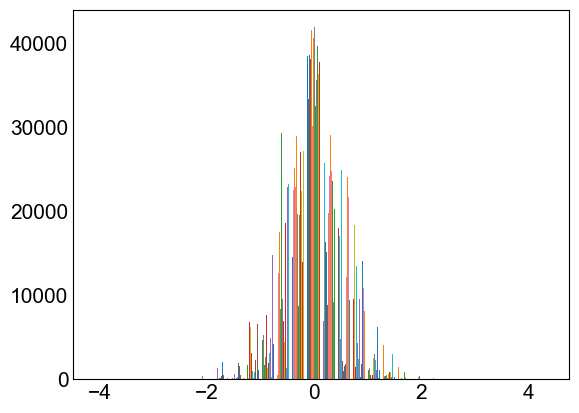

In [21]:
plt.hist(df.values, bins=30)

### Plot by labels

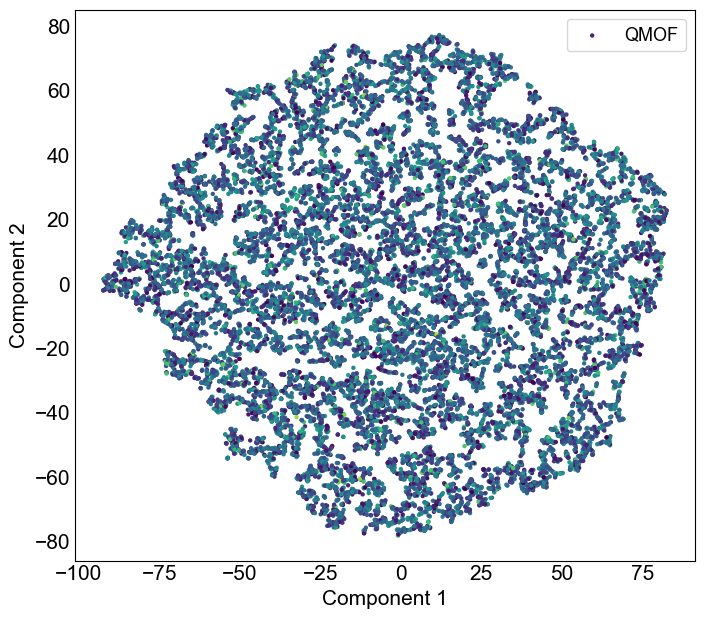

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_aspect('equal')

plt.scatter(x=emb_qmof[:, 0], y=emb_qmof[:, 1], s=10, edgecolor="None", c=df_qmof["outputs.pbe.bandgap"], label="QMOF")

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

ax.legend()
plt.show()